In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

Reading data and basic stats

In [2]:
df = pd.read_csv('laptop_prices.csv')

In [3]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [4]:
df.shape

(1275, 23)

Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [6]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [7]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analysis

In [10]:
df.head(1)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640


<Axes: xlabel='OS'>

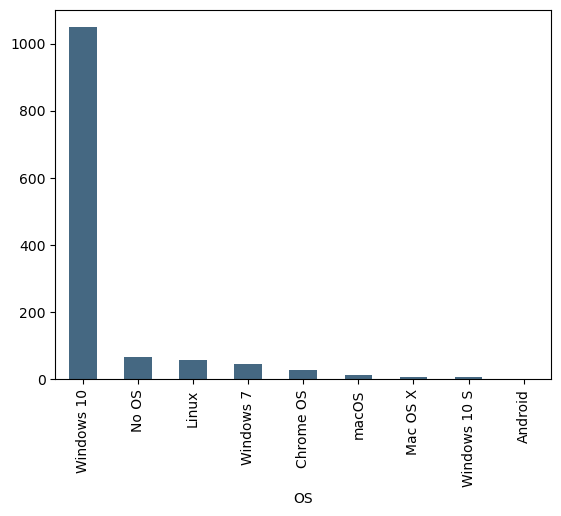

In [11]:
df['OS'].value_counts().plot(kind='bar',  color = '#456882')

<Axes: xlabel='Screen'>

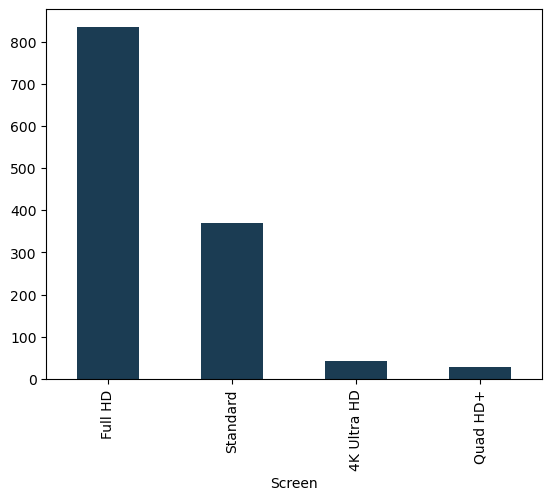

In [12]:
df['Screen'].value_counts().plot(kind='bar',color = '#1B3C53')

<Axes: xlabel='CPU_company'>

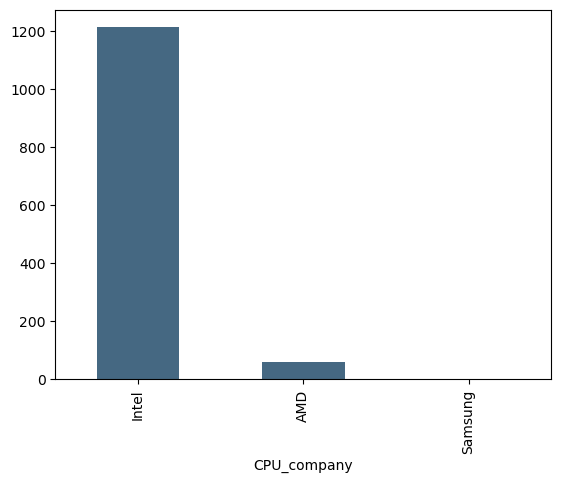

In [13]:
df['CPU_company'].value_counts().plot(kind='bar',color = '#456882')

<Axes: xlabel='GPU_company'>

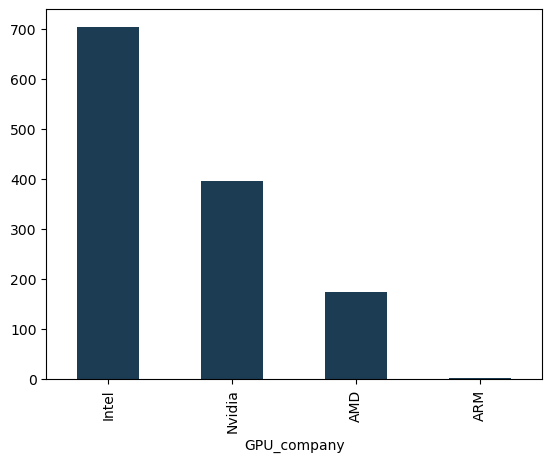

In [14]:
df['GPU_company'].value_counts().plot(kind='bar',color = '#1B3C53')

<Axes: xlabel='Ram'>

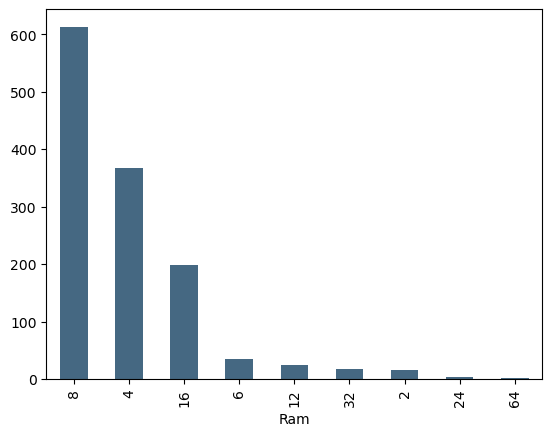

In [15]:
df['Ram'].value_counts().plot(kind='bar',color = '#456882')

<Axes: xlabel='SecondaryStorageType'>

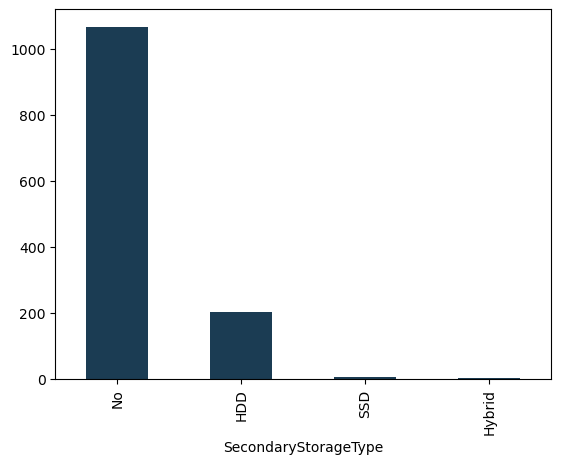

In [16]:
df['SecondaryStorageType'].value_counts().plot(kind='bar',color = '#1B3C53')

<Axes: xlabel='PrimaryStorageType'>

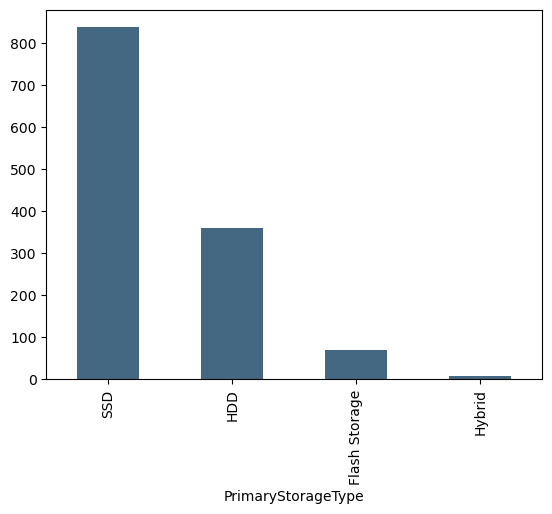

In [17]:
df['PrimaryStorageType'].value_counts().plot(kind='bar',color = '#456882')

<Axes: xlabel='Inches'>

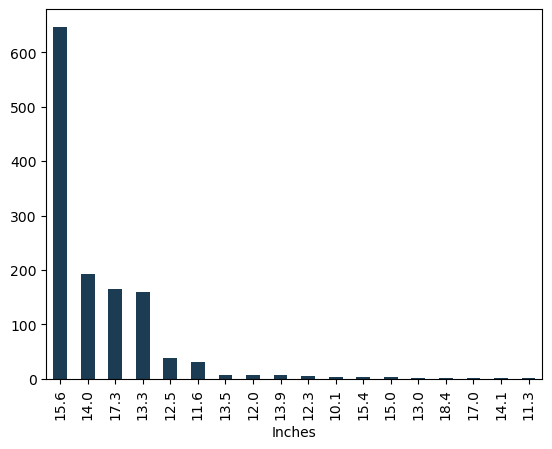

In [18]:
df['Inches'].value_counts().plot(kind='bar',color = '#1B3C53')

<Axes: ylabel='count'>

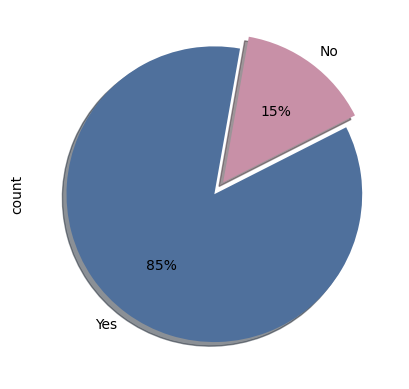

In [19]:
df['Touchscreen'].value_counts().plot(kind='pie', labels = ['Yes','No'],colors=['#4F709C', '#C890A7'], explode=[0,0.1], shadow = True, startangle = 80, autopct = '%.f%%',  textprops = {'color' : 'black'})

<Axes: ylabel='count'>

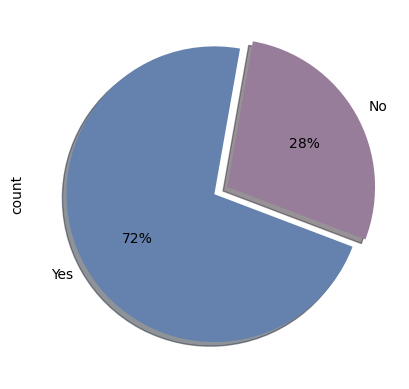

In [20]:
df['IPSpanel'].value_counts().plot(kind='pie', labels = ['Yes','No'],colors=['#6482AD', '#987D9A'], explode=[0,0.1], shadow = True, startangle = 80, autopct = '%.f%%',  textprops = {'color' : 'black'})

Price Insights

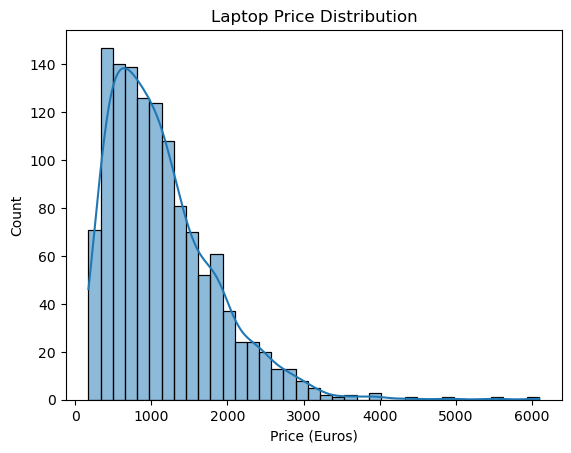

In [21]:
# Price Distribution
sns.histplot(df['Price_euros'], kde=True)
plt.title("Laptop Price Distribution")
plt.xlabel("Price (Euros)")
plt.ylabel("Count")
plt.show()

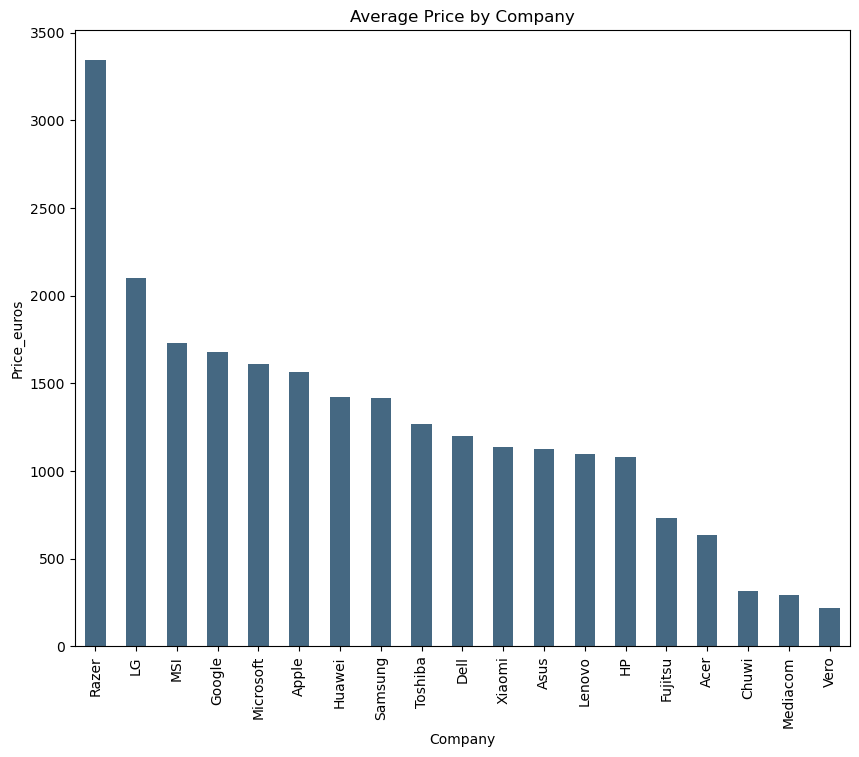

In [22]:
# Which companies sell the most expensive laptops on average?
# Average price by CPU brand
companies = price = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
companies.plot(kind='bar', figsize=(10,8), color = '#456882')
plt.title("Average Price by Company")
plt.xlabel('Company')
plt.ylabel('Price_euros')
plt.show()

Brand-Level Analysis

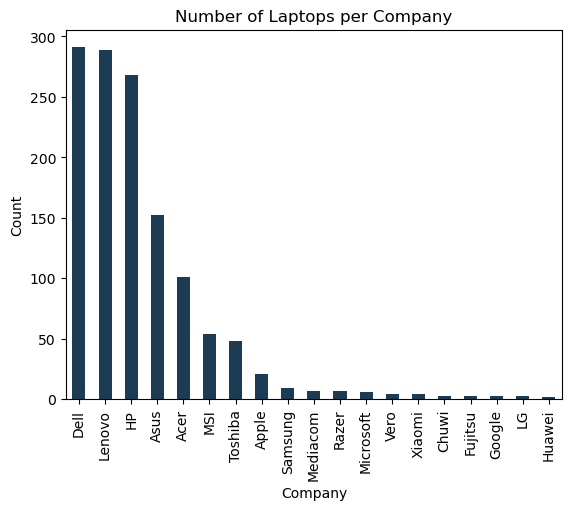

In [23]:
#Which companies dominate the market? 
df['Company'].value_counts().plot(kind = 'bar', color = '#1B3C53')
plt.title("Number of Laptops per Company")
plt.ylabel("Count")
plt.show()

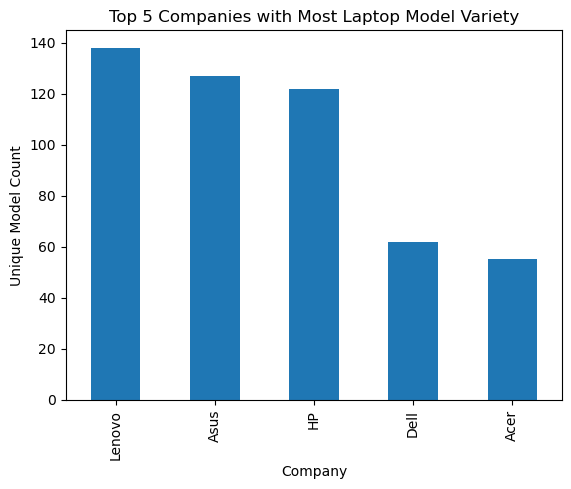

In [24]:
# Top 5 companies with the most variety of laptop models
df.groupby('Company')['Product'].nunique().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title("Top 5 Companies with Most Laptop Model Variety")
plt.ylabel("Unique Model Count")
plt.show()

Specifications vs Price

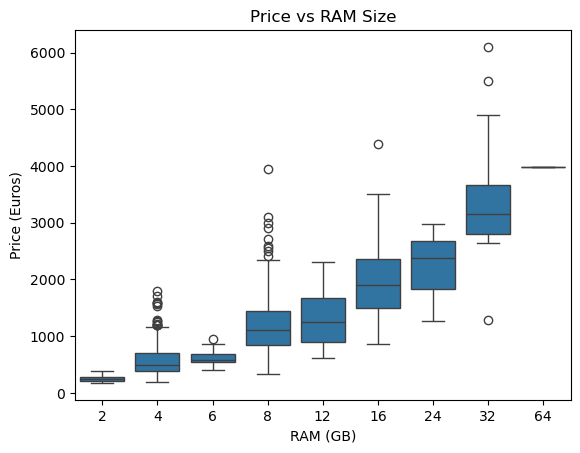

In [25]:
# Does RAM size affect price?
#Ram vs Price
sns.boxplot(x = df['Ram'], y = df['Price_euros'])
plt.title("Price vs RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euros)")
plt.show()

In [26]:
# How does screen size (Inches) impact price?

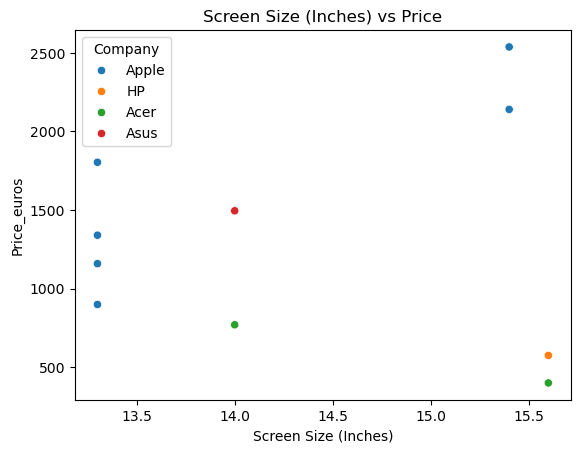

In [27]:
# Factors Influencing Laptop Prices : Company, CPU, PrimaryStorageType, GPU
# Screen Size (Inches) vs Price
sns.scatterplot(x = df['Inches'], y = df['Price_euros'], hue = df['Company'].head(10),data = df)
plt.title("Screen Size (Inches) vs Price")
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price_euros')
plt.show()

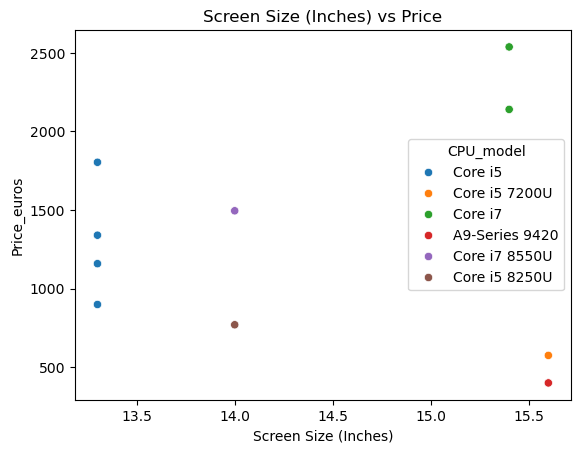

In [28]:
# Screen Size (Inches) vs Price
sns.scatterplot(x = df['Inches'], y = df['Price_euros'], hue = df['CPU_model'].head(10),data = df)
plt.title("Screen Size (Inches) vs Price")
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price_euros')
plt.show()

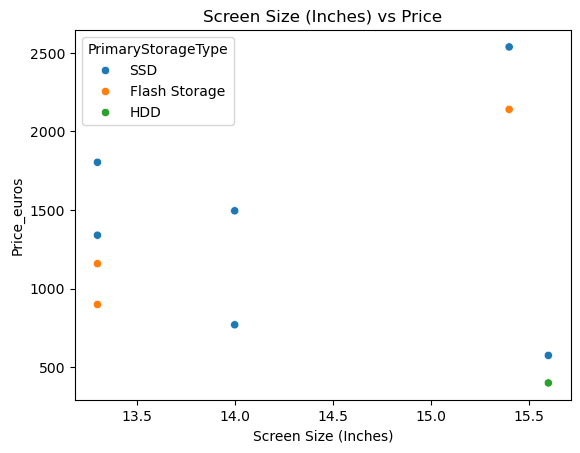

In [29]:
# Screen Size (Inches) vs Price
sns.scatterplot(x = df['Inches'], y = df['Price_euros'], hue = df['PrimaryStorageType'].head(10),data = df)
plt.title("Screen Size (Inches) vs Price")
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price_euros')
plt.show()

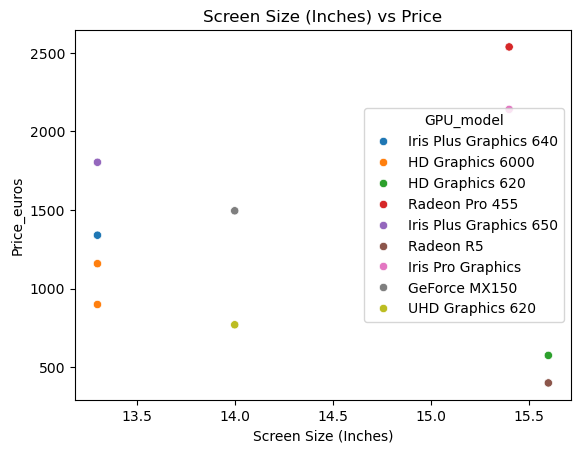

In [30]:
# Screen Size (Inches) vs Price
sns.scatterplot(x = df['Inches'], y = df['Price_euros'], hue = df['GPU_model'].head(10),data = df)
plt.title("Screen Size (Inches) vs Price")
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price_euros')
plt.show()

In [31]:
# Does Touchscreen increase laptop price?
# Touchscreen Impact on Price

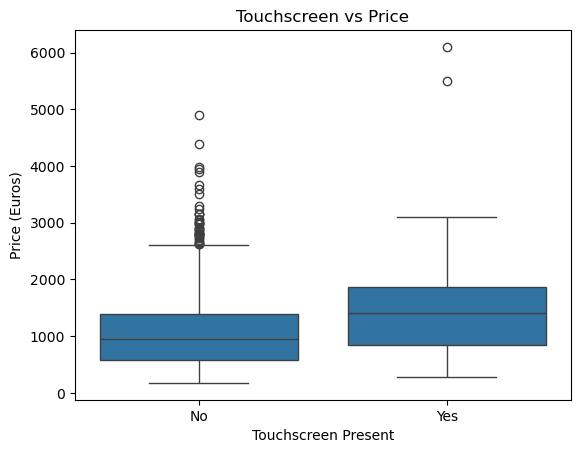

Touchscreen
No     1079.944204
Yes    1453.118085
Name: Price_euros, dtype: float64

In [32]:
sns.boxplot(x = df['Touchscreen'], y = df['Price_euros'], data=df)
plt.title("Touchscreen vs Price")
plt.xlabel("Touchscreen Present")
plt.ylabel("Price (Euros)")
plt.show()

df.groupby('Touchscreen')['Price_euros'].mean()

In [33]:
# Is IPS Panel associated with higher prices?
# IPS Panel Impact on Price

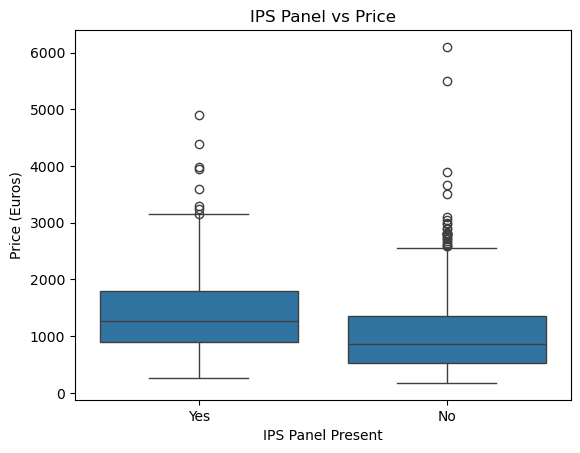

IPSpanel
No     1025.440882
Yes    1416.612941
Name: Price_euros, dtype: float64

In [34]:
sns.boxplot(x = df['IPSpanel'] , y= df['Price_euros'] , data = df)
plt.title("IPS Panel vs Price")
plt.xlabel("IPS Panel Present")
plt.ylabel("Price (Euros)")
plt.show()

df.groupby('IPSpanel')['Price_euros'].mean()

In [35]:
# Is Retina Display more expensive compared to non-Retina?
# Retina Display vs Price

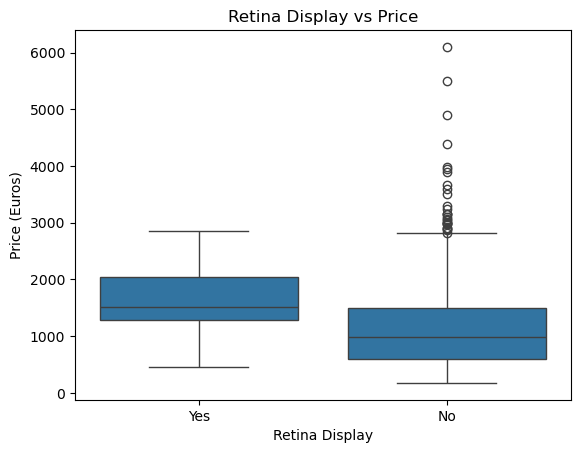

RetinaDisplay
No     1127.903037
Yes    1657.854706
Name: Price_euros, dtype: float64

In [36]:
sns.boxplot(x = df['RetinaDisplay'], y = df['Price_euros'])
plt.title("Retina Display vs Price")
plt.xlabel("Retina Display")
plt.ylabel("Price (Euros)")
plt.show()
df.groupby('RetinaDisplay')['Price_euros'].mean()

CPU Analysis

In [37]:
# CPU Brand vs Price

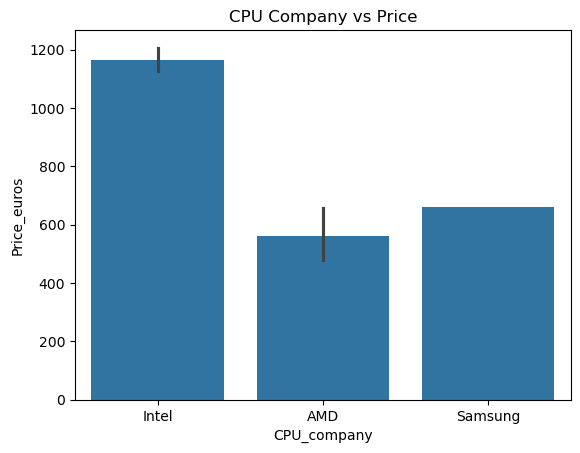

GPU_company
AMD        778.026552
ARM        659.000000
Intel     1020.367713
Nvidia    1496.745101
Name: Price_euros, dtype: float64

In [38]:
sns.barplot(x = df['CPU_company'], y = df['Price_euros'] , data = df)
plt.title("CPU Company vs Price")
plt.show()

df.groupby('GPU_company')['Price_euros'].mean()

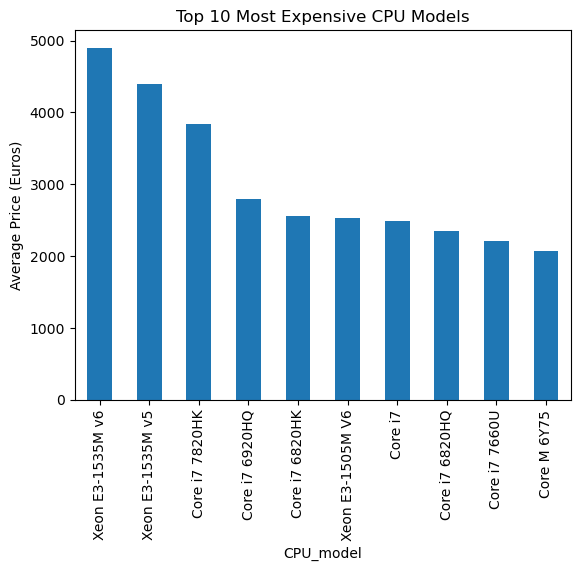

In [39]:
# Top 10 most expensive CPU models
df.groupby('CPU_model')['Price_euros'].mean().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title("Top 10 Most Expensive CPU Models")
plt.ylabel("Average Price (Euros)")
plt.show()

In [40]:
# Does higher CPU frequency lead to higher price?
# CPU Frequency vs Price

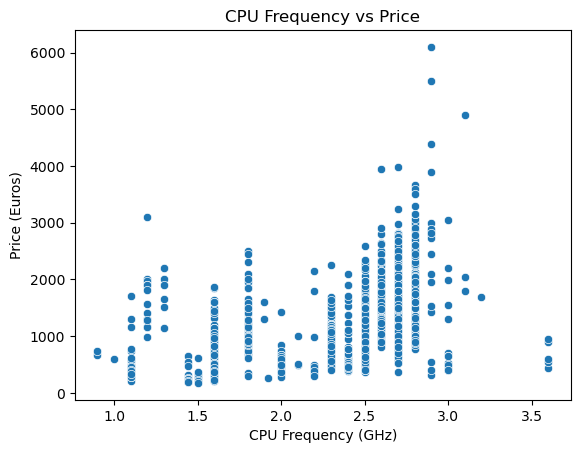

In [41]:
sns.scatterplot(x = df['CPU_freq'], y = df['Price_euros'], data = df)
plt.title("CPU Frequency vs Price")
plt.xlabel("CPU Frequency (GHz)")
plt.ylabel("Price (Euros)")
plt.show()

GPU Analysis

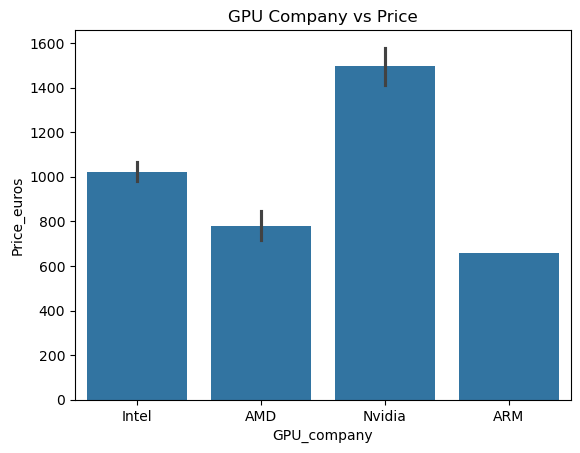

GPU_company
AMD        778.026552
ARM        659.000000
Intel     1020.367713
Nvidia    1496.745101
Name: Price_euros, dtype: float64

In [42]:
# GPU Brand vs Price
sns.barplot(x = df['GPU_company'], y = df['Price_euros'] , data = df)
plt.title("GPU Company vs Price")
plt.show()

df.groupby('GPU_company')['Price_euros'].mean()

Storage Analysis

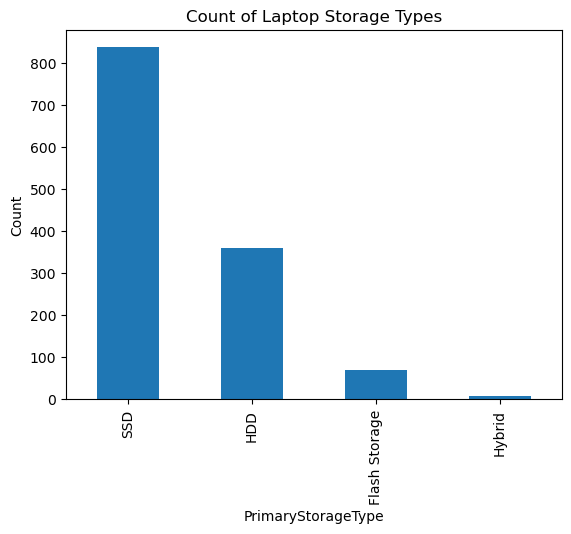

In [43]:
# How many laptops have SSD vs HDD vs Hybrid storage?
df['PrimaryStorageType'].value_counts().plot(kind='bar')
plt.title("Count of Laptop Storage Types")
plt.ylabel("Count")
plt.show()

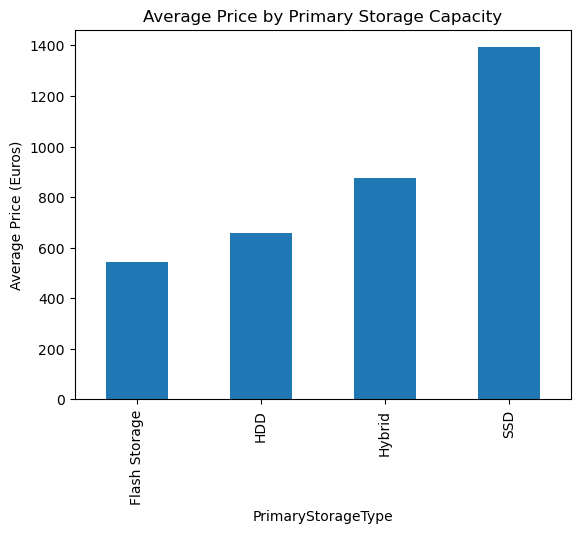

In [44]:
# Average price by primary storage capacity
df.groupby('PrimaryStorageType')['Price_euros'].mean().sort_values().plot(kind='bar')
plt.title("Average Price by Primary Storage Capacity")
plt.ylabel("Average Price (Euros)")
plt.show()

In [45]:
# Storage Type (SSD/HDD) vs Price

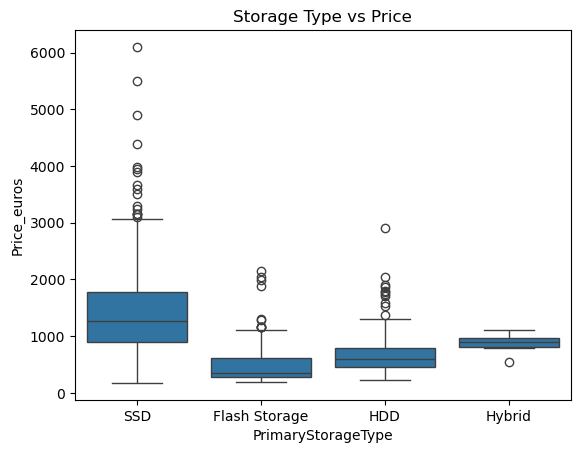

PrimaryStorageType
Flash Storage     544.994648
HDD               658.401226
Hybrid            875.935000
SSD              1391.896547
Name: Price_euros, dtype: float64

In [46]:
sns.boxplot(x = df['PrimaryStorageType'], y = df['Price_euros'])
plt.title("Storage Type vs Price")
plt.show()

df.groupby('PrimaryStorageType')['Price_euros'].mean()

Screen & Display Analysis

In [47]:
# Screen Resolution vs Price

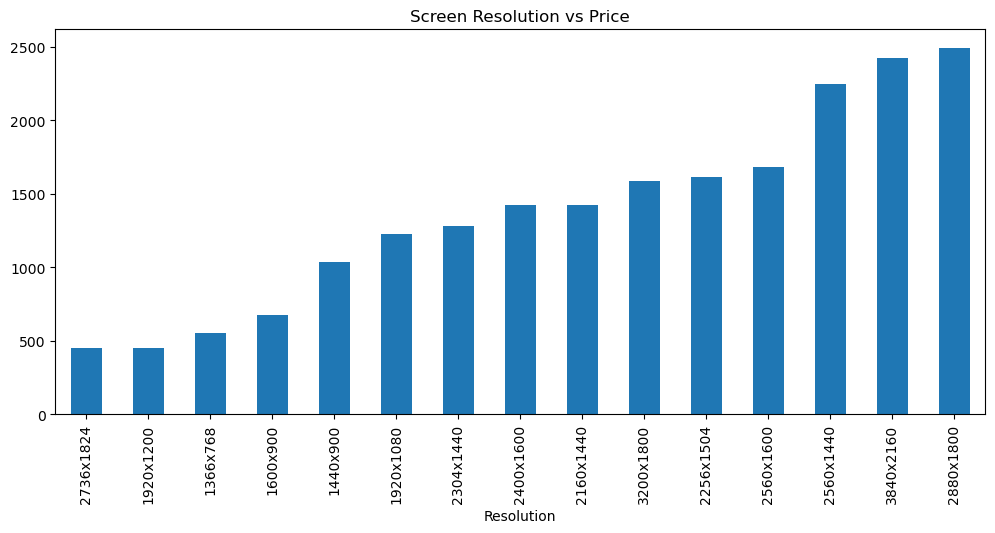

In [48]:
df['Resolution'] = df['ScreenW'].astype(str) + "x" + df['ScreenH'].astype(str)

plt.figure(figsize=(12,5))
df.groupby('Resolution')['Price_euros'].mean().sort_values().plot(kind='bar')
plt.title("Screen Resolution vs Price")
plt.show()


Operating System Trends

In [49]:
# Price by Operating System

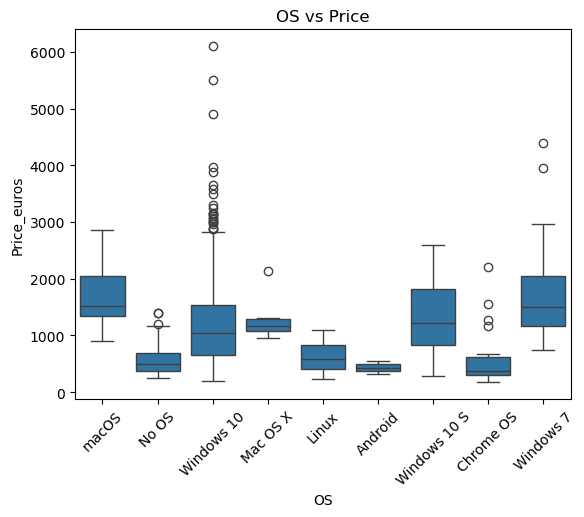

OS
Android          434.000000
Chrome OS        553.585185
Linux            621.867069
Mac OS X        1262.871250
No OS            587.973333
Windows 10      1180.684065
Windows 10 S    1286.480000
Windows 7       1686.651333
macOS           1749.630769
Name: Price_euros, dtype: float64

In [50]:
sns.boxplot(x = df['OS'], y = df['Price_euros'], data = df)
plt.xticks(rotation=45)
plt.title("OS vs Price")
plt.show()

df.groupby('OS')['Price_euros'].mean()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [52]:
#find strogest column
df.corr(numeric_only=True)

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Inches,1.000000,0.241078,0.826638,0.066608,-0.068223,-0.093062,0.305037,0.264280,0.389067
Ram,0.241078,1.000000,0.389370,0.740287,0.424089,0.415241,0.366254,0.015365,0.390939
Weight,0.826638,0.389370,1.000000,0.211883,-0.028605,-0.050106,0.318649,0.175433,0.481495
Price_euros,0.066608,0.740287,0.211883,1.000000,0.552491,0.548529,0.428847,-0.124775,0.291207
ScreenW,-0.068223,0.424089,-0.028605,0.552491,1.000000,0.994069,0.178659,-0.072977,0.146232
ScreenH,-0.093062,0.415241,-0.050106,0.548529,0.994069,1.000000,0.164369,-0.080135,0.135293
CPU_freq,0.305037,0.366254,0.318649,0.428847,0.178659,0.164369,1.000000,0.056320,0.224521
PrimaryStorage,0.264280,0.015365,0.175433,-0.124775,-0.072977,-0.080135,0.056320,1.000000,-0.244182
SecondaryStorage,0.389067,0.390939,0.481495,0.291207,0.146232,0.135293,0.224521,-0.244182,1.000000


In [53]:
#Using Scikitlearn , predicte laptop Price

In [54]:
# Create the stratified test set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [55]:
df['Ram_cat'] = pd.cut(df['Ram'], bins = [0,4,8,16,32,np.inf], labels=[1,2,3,4,5])

In [56]:
ram_counts = df['Ram_cat'].value_counts()
# keep only categories with at least 2 samples
valid_ram = ram_counts[ram_counts >= 2].index
df = df[df['Ram_cat'].isin(valid_ram)]

In [57]:
for train_index , test_index in split.split(df, df['Ram_cat']):
    train_data = df.iloc[train_index].drop(['Ram_cat', 'Resolution'], axis = 1)
    test_data = df.iloc[test_index].drop(['Ram_cat','Resolution'], axis = 1)

In [58]:
# we will work on the copy of the train data set
laptop_data = train_data.copy()

In [59]:
# separate featurres and labels
laptop_features = laptop_data.drop('Price_euros', axis =1)
laptop_label = laptop_data['Price_euros'] 

In [60]:
laptop_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 741 to 1128
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1019 non-null   object 
 1   Product               1019 non-null   object 
 2   TypeName              1019 non-null   object 
 3   Inches                1019 non-null   float64
 4   Ram                   1019 non-null   int64  
 5   OS                    1019 non-null   object 
 6   Weight                1019 non-null   float64
 7   Screen                1019 non-null   object 
 8   ScreenW               1019 non-null   int64  
 9   ScreenH               1019 non-null   int64  
 10  Touchscreen           1019 non-null   object 
 11  IPSpanel              1019 non-null   object 
 12  RetinaDisplay         1019 non-null   object 
 13  CPU_company           1019 non-null   object 
 14  CPU_freq              1019 non-null   float64
 15  CPU_model             10

In [61]:
# separate numerical and categorical columns
num_attributes = laptop_features[['Inches','Ram','Weight','ScreenW','ScreenH','CPU_freq','PrimaryStorage','SecondaryStorage']].columns.tolist()
cat_attributes = laptop_features[['Company','Product','TypeName','OS','Screen','Touchscreen','IPSpanel','RetinaDisplay','CPU_company','CPU_model','PrimaryStorageType','SecondaryStorageType','GPU_company','GPU_model']].columns.tolist()

In [62]:
# Lets make pipline

In [63]:
# For numerical columns
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

In [64]:
# For Categorical columns
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

In [65]:
# Constuct full pipline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes)
])

In [66]:
# Transform the data
laptop_prepared = full_pipeline.fit_transform(laptop_features)

In [67]:
feature_names = full_pipeline.get_feature_names_out()

In [68]:
laptop_prepared_df = pd.DataFrame(laptop_prepared.toarray(), columns = feature_names, index = laptop_features.index)

In [69]:
# Train the model
# linear regession model
lin_model = LinearRegression()
lin_model.fit(laptop_prepared, laptop_label)
lin_pred = lin_model.predict(laptop_prepared)
lin_rmse = root_mean_squared_error(laptop_label, lin_pred)
print(f'Linear RMSE : {lin_rmse}')
lin_rmses = -cross_val_score(lin_model,laptop_prepared,laptop_label, scoring="neg_root_mean_squared_error", cv = 10 )
print(pd.Series(lin_rmses).describe())

Linear RMSE : 97.1172350175718
count     10.000000
mean     333.603367
std       67.372562
min      230.127578
25%      296.521010
50%      328.186930
75%      368.394399
max      456.597051
dtype: float64


In [70]:
# Desicion tree model
dec_model = DecisionTreeRegressor()
dec_model.fit(laptop_prepared, laptop_label)
dec_pred = dec_model.predict(laptop_prepared)
dec_rmse = root_mean_squared_error(laptop_label, dec_pred)
print(f'Desicion tree RMSE : {dec_rmse}')
dec_rmses = -cross_val_score(dec_model,laptop_prepared,laptop_label, scoring="neg_root_mean_squared_error", cv = 10 )
print(pd.Series(dec_rmses).describe())

Desicion tree RMSE : 16.45151094176241
count     10.000000
mean     365.583594
std       64.732851
min      264.460001
25%      331.800218
50%      364.863980
75%      403.459305
max      460.625919
dtype: float64


In [71]:
# Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(laptop_prepared, laptop_label)
random_forest_pred = random_forest_model.predict(laptop_prepared)
random_forest_rmse = root_mean_squared_error(laptop_label, random_forest_pred)
print(f'random_forest RMSE : {random_forest_rmse}')
random_forest_rmses = -cross_val_score(random_forest_model,laptop_prepared,laptop_label, scoring="neg_root_mean_squared_error", cv = 10 )
print(pd.Series(random_forest_rmses).describe())

random_forest RMSE : 102.24517929036972
count     10.000000
mean     275.605303
std       65.067923
min      184.041011
25%      240.069061
50%      262.006458
75%      309.233683
max      409.255066
dtype: float64


In [72]:
test_prepared = full_pipeline.transform(test_data)

In [ ]:
predicted_price = random_forest_model.predict(test_prepared)

In [ ]:
test_data_label = test_data['Price_euros'].copy()
test_data_features = test_data.drop('Price_euros', axis =1)

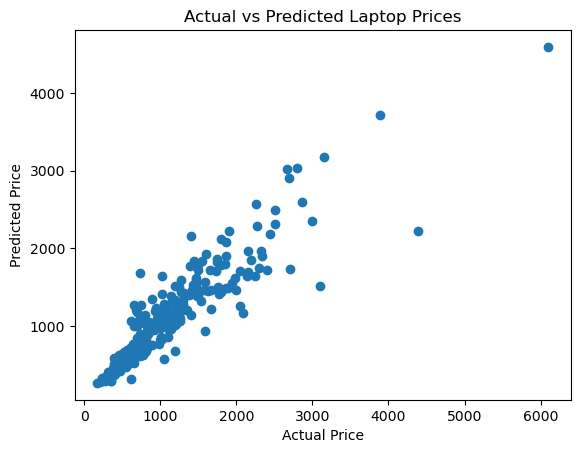

In [ ]:
plt.scatter(test_data_label, predicted_price)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()

“Linear Regression underfit the data because laptop prices have non-linear relationships.
Decision Tree captured non-linearity but overfitted.
Random Forest reduced overfitting by combining multiple trees and achieved the best RMSE and R², so I selected it.”